In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 

In [2]:
data3=pd.read_csv('icd_grouped.csv')
data3.head(30)
#print(data3)

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,...,SEQ_NUM,SHORT_TITLE_y,LONG_TITLE_y,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,581403,...,5.0,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",42458,F,2139-07-17 00:00:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,137110,...,3.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",11489,M,2092-01-24 00:00:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,236331,...,8.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",19998,M,2086-10-17 00:00:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,437948,...,3.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",34186,M,2101-04-18 00:00:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,459979,...,4.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",35441,F,2059-08-24 00:00:00,0,NaN,NaN,0
5,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,465492,...,18.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",35752,F,2061-11-17 00:00:00,1,2114-12-06 00:00:00,2114-12-06 00:00:00,1
6,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,512387,...,9.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",38472,M,1854-03-20 00:00:00,1,2154-09-19 00:00:00,2154-09-19 00:00:00,1
7,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,589168,...,2.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",42918,M,2064-12-29 00:00:00,0,NaN,NaN,0
8,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,604333,...,9.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",43862,M,2110-06-25 00:00:00,1,2192-10-27 00:00:00,2192-10-27 00:00:00,1
9,192,1193,Pulmon TB NOS-micro dx,"Pulmonary tuberculosis, unspecified, tubercle ...",1,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,250894,...,1.0,Pulmon TB NOS-micro dx,"Pulmonary tuberculosis, unspecified, tubercle ...",21265,F,2064-08-20 00:00:00,0,NaN,NaN,0


In [3]:
data = pd.read_csv('diagnose_merged.csv')
data.head()
#print(data)




,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,0,2,163353,1.0,V3001,Single lb in-hosp w cs,"Single liveborn, born in hospital, delivered b..."
1,1,2,163353,2.0,V053,Need prphyl vc vrl hepat,Need for prophylactic vaccination and inoculat...
2,2,2,163353,3.0,V290,NB obsrv suspct infect,Observation for suspected infectious condition
3,3,3,145834,9.0,2639,Protein-cal malnutr NOS,Unspecified protein-calorie malnutrition
4,4,3,145834,7.0,6826,Cellulitis of leg,"Cellulitis and abscess of leg, except foot"


In [ ]:
merged1 = pd.merge(data3, data, how='inner', on=['ICD9_CODE'])
merged1.head()
#print(merged)


In [ ]:
data2 = pd.read_csv('PATIENTS.csv')
data2.head()
#print(data2)

In [7]:
merged = pd.merge(merged1, data2, how='inner', on=['SUBJECT_ID'])
#merged2.head()
print(merged)

        ROW_ID_x ICD9_CODE             SHORT_TITLE_x  \
0            188     01186    Pulmon TB NEC-oth test   
1            509     04185  Oth gram negatv bacteria   
2           1409      1123     Cutaneous candidiasis   
3           1459      1179         Mycoses NEC & NOS   
4           1901     20500  Ac myl leuk wo achv rmsn   
...          ...       ...                       ...   
634704     12202      V053  Need prphyl vc vrl hepat   
634705     13918     V1087  Hx of thyroid malignancy   
634706     13273     80606  C5-c7 fx-cl/com cord les   
634707      9816     E8801     Fall on sidewalk curb   
634708     10139     V4579  Acq absence of organ NEC   

                                             LONG_TITLE_x group lv.1_code  \
0       Other specified pulmonary tuberculosis, tuberc...    01   010-018   
1       Other specified bacterial infections in condit...    04   030-041   
2                           Candidiasis of skin and nails    11   110-118   
3                  

In [8]:
#create csv file
#merged.to_csv(r'/Users/kathy908000/github/Health-Care-Research/clusterdata.csv', index = False)

In [9]:
#X = 'ICD9_CODE'
#dendrogram = sch.dendrogram(sch.linkage('X', method='ward'))

#X = 'ICD9_CODE'
#linked = linkage(X, 'complete')

In [10]:
# patient and diagnosis 
# x = diagnosis group 
#correlation or covariate= corx  

#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
#cluster.fit_predict(X)

In [11]:
#import scipy.cluster.hierarchy as shc
#plt.figure(figsize=(10, 7))  
#plt.title("Dendrograms")  
#dend = shc.dendrogram(shc.linkage(data, method='complete'))
merged.dtypes

ROW_ID_x           int64
ICD9_CODE         object
SHORT_TITLE_x     object
LONG_TITLE_x      object
group             object
lv.1_code         object
lv.2_code         object
lv.1_group        object
lv.2_group        object
Unnamed: 0         int64
SUBJECT_ID         int64
HADM_ID            int64
SEQ_NUM          float64
SHORT_TITLE_y     object
LONG_TITLE_y      object
ROW_ID_y           int64
GENDER            object
DOB               object
DOD               object
DOD_HOSP          object
DOD_SSN           object
EXPIRE_FLAG        int64
dtype: object

# Map Categorical Data

In [12]:

datamap = merged.copy()
#datamap['lv.1_code'] = datamap['lv.2_code']. map('11':1, '12': 2, '13': 3 )


datamap['lv.2_code'] = datamap['lv.2_code'].str.replace('V','10',regex=True)
datamap['lv.2_code'] = datamap['lv.2_code'].astype(np.float)
datamap.head(30)


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,...,SEQ_NUM,SHORT_TITLE_y,LONG_TITLE_y,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,01186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",01,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,581403,...,5.0,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
1,509,04185,Oth gram negatv bacteria,Other specified bacterial infections in condit...,04,030-041,41.0,OTHER BACTERIAL DISEASES,Bacterial infection in conditions classified e...,581419,...,8.0,Oth gram negatv bacteria,Other specified bacterial infections in condit...,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
2,1409,1123,Cutaneous candidiasis,Candidiasis of skin and nails,11,110-118,112.0,MYCOSES,Candidiasis,581412,...,15.0,Cutaneous candidiasis,Candidiasis of skin and nails,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
3,1459,1179,Mycoses NEC & NOS,Other and unspecified mycoses,11,110-118,117.0,MYCOSES,Other mycoses,581420,...,6.0,Mycoses NEC & NOS,Other and unspecified mycoses,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
4,1901,20500,Ac myl leuk wo achv rmsn,"Acute myeloid leukemia, without mention of hav...",20,200-208,205.0,MALIGNANT NEOPLASM OF LYMPHATIC AND HEMATOPOIE...,Myeloid leukemia,581400,...,1.0,Ac myl leuk wo achv rmsn,"Acute myeloid leukemia, without mention of hav...",42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
5,3175,28803,Drug induced neutropenia,Drug induced neutropenia,28,280-289,288.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Diseases of white blood cells,581417,...,10.0,Drug induced neutropenia,Drug induced neutropenia,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
6,3241,29281,Drug-induced delirium,Drug-induced delirium,29,290-299,292.0,PSYCHOSES,Drug-induced mental disorders,581405,...,7.0,Drug-induced delirium,Drug-induced delirium,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
7,5514,48283,Pneumo oth grm-neg bact,Pneumonia due to other gram-negative bacteria,48,480-488,482.0,PNEUMONIA AND INFLUENZA,Other bacterial pneumonia,581399,...,4.0,Pneumo oth grm-neg bact,Pneumonia due to other gram-negative bacteria,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
8,5418,4619,Acute sinusitis NOS,"Acute sinusitis, unspecified",46,460-466,461.0,ACUTE RESPIRATORY INFECTIONS,Acute sinusitis,581413,...,14.0,Acute sinusitis NOS,"Acute sinusitis, unspecified",42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0
9,5446,4730,Chr maxillary sinusitis,Chronic maxillary sinusitis,47,470-478,473.0,OTHER DISEASES OF THE UPPER RESPIRATORY TRACT,Chronic sinusitis,581408,...,20.0,Chr maxillary sinusitis,Chronic maxillary sinusitis,42458,F,2139-07-17 00:00:00,NaN,NaN,NaN,0


In [35]:
datamap['GENDER'] = datamap['GENDER'].map({'F':1, 'M': 2})
datamap.head()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,...,SEQ_NUM,SHORT_TITLE_y,LONG_TITLE_y,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,01186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",01,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,581403,...,5.0,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",42458,NaN,2139-07-17 00:00:00,NaN,NaN,NaN,0
1,509,04185,Oth gram negatv bacteria,Other specified bacterial infections in condit...,04,030-041,41.0,OTHER BACTERIAL DISEASES,Bacterial infection in conditions classified e...,581419,...,8.0,Oth gram negatv bacteria,Other specified bacterial infections in condit...,42458,NaN,2139-07-17 00:00:00,NaN,NaN,NaN,0
2,1409,1123,Cutaneous candidiasis,Candidiasis of skin and nails,11,110-118,112.0,MYCOSES,Candidiasis,581412,...,15.0,Cutaneous candidiasis,Candidiasis of skin and nails,42458,NaN,2139-07-17 00:00:00,NaN,NaN,NaN,0
3,1459,1179,Mycoses NEC & NOS,Other and unspecified mycoses,11,110-118,117.0,MYCOSES,Other mycoses,581420,...,6.0,Mycoses NEC & NOS,Other and unspecified mycoses,42458,NaN,2139-07-17 00:00:00,NaN,NaN,NaN,0
4,1901,20500,Ac myl leuk wo achv rmsn,"Acute myeloid leukemia, without mention of hav...",20,200-208,205.0,MALIGNANT NEOPLASM OF LYMPHATIC AND HEMATOPOIE...,Myeloid leukemia,581400,...,1.0,Ac myl leuk wo achv rmsn,"Acute myeloid leukemia, without mention of hav...",42458,NaN,2139-07-17 00:00:00,NaN,NaN,NaN,0


# correlation distance of numerical columns 

In [14]:
## compute correlation distance 
#Compute pairwise correlation of columns, excluding NA/null values

## only computed correlation for numerical columns 

dist = datamap.corr()
dist

,ROW_ID_x,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,EXPIRE_FLAG
ROW_ID_x,1.000000,0.757721,-0.039625,-0.039359,-0.001904,0.074785,-0.039224,0.009830,-0.113342
lv.2_code,0.757721,1.000000,-0.062456,-0.062041,-0.001121,0.002666,-0.061789,0.009710,-0.085824
Unnamed: 0,-0.039625,-0.062456,1.000000,0.974213,0.007524,0.187029,0.996078,-0.000937,-0.132829
SUBJECT_ID,-0.039359,-0.062041,0.974213,1.000000,0.006994,0.182975,0.950872,-0.001480,-0.135090
HADM_ID,-0.001904,-0.001121,0.007524,0.006994,1.000000,-0.001038,0.007605,0.002083,-0.000865
SEQ_NUM,0.074785,0.002666,0.187029,0.182975,-0.001038,1.000000,0.186030,-0.002999,0.115414
ROW_ID_y,-0.039224,-0.061789,0.996078,0.950872,0.007605,0.186030,1.000000,-0.000757,-0.130075
GENDER,0.009830,0.009710,-0.000937,-0.001480,0.002083,-0.002999,-0.000757,1.000000,-0.009639
EXPIRE_FLAG,-0.113342,-0.085824,-0.132829,-0.135090,-0.000865,0.115414,-0.130075,-0.009639,1.000000


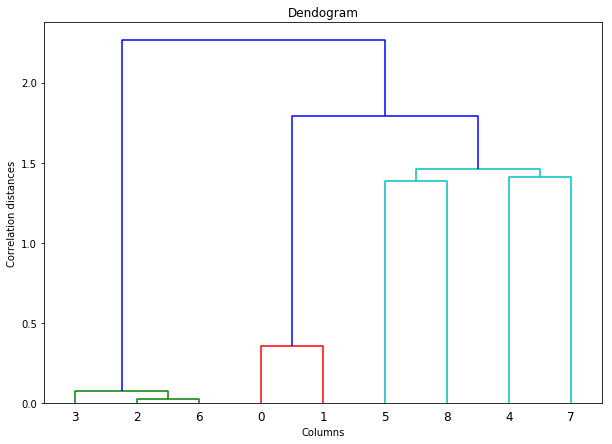

In [33]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
plt.xlabel('Columns')
plt.ylabel('Correlation distances')
#dist= shc.distance.pdist(merged.corr(), 'hamming')
dend = shc.dendrogram(shc.linkage(dist, method='complete'))
#dend = shc.dendrogram(shc.linkage(d, merged, method='complete'))


# Hierarchial Clustering1

In [16]:

from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='=complete')
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([0, 1, 1, 0, 4, 5, 2, 3, 0])

In [17]:
print(cluster.labels_)

[0 1 1 0 4 5 2 3 0]


In [18]:
dist1 = dist.iloc[:,0]
dist2 = dist.iloc[:,1]

In [25]:
dist1

0         01186
1         04185
2          1123
3          1179
4         20500
          ...  
634704     V053
634705    V1087
634706    80606
634707    E8801
634708    V4579
Name: ICD9_CODE, Length: 634709, dtype: object

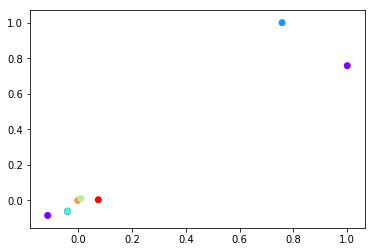

In [19]:
#plt.figure(figsize=(10, 7))
#plt.scatter(dist[:,0], dist[:,1], c=cluster.labels_, cmap='rainbow')

plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [26]:
dist1

0         01186
1         04185
2          1123
3          1179
4         20500
          ...  
634704     V053
634705    V1087
634706    80606
634707    E8801
634708    V4579
Name: ICD9_CODE, Length: 634709, dtype: object

# Clustering with 3 clusters

In [20]:
## 3 clusters 
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([0, 1, 1, 0, 0, 0, 2, 0, 0])

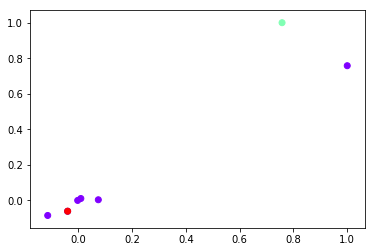

In [21]:

dist1 = dist.iloc[:,0]
dist2 = dist.iloc[:,1]
plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

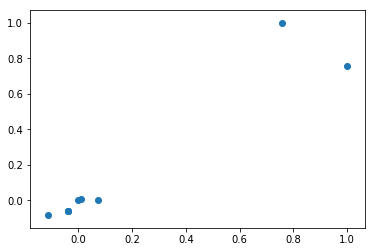

In [22]:
plt.scatter(dist1, dist2, cmap='rainbow')

# clustering for lvl2 code 

In [23]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([0, 1, 1, 0, 0, 0, 2, 0, 0])

In [24]:
dist1 = datamap.iloc[:,1] # lvl2 code
dist2 = datamap.iloc[:,7] # gender
print(dist1)

0         01186
1         04185
2          1123
3          1179
4         20500
          ...  
634704     V053
634705    V1087
634706    80606
634707    E8801
634708    V4579
Name: ICD9_CODE, Length: 634709, dtype: object


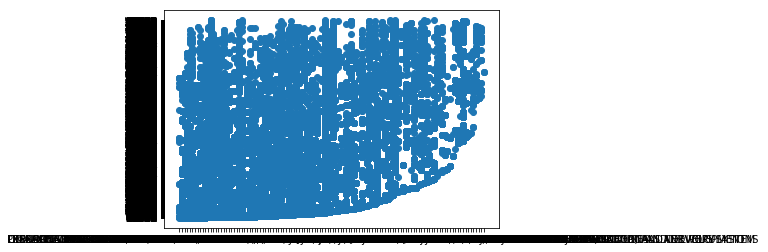

In [27]:
dist1 = datamap.iloc[:,1] # lvl2 code
dist2 = datamap.iloc[:,7] # gender

plt.scatter(dist2, dist1, cmap='rainbow')

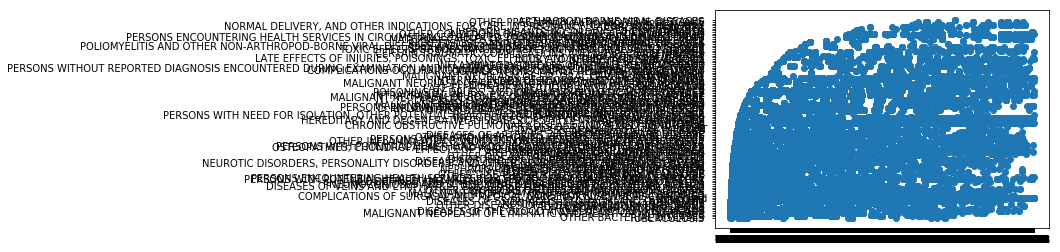

In [22]:
dist1 = datamap.iloc[:,1] # lvl2 code
dist2 = datamap.iloc[:,7] # gender

plt.scatter(dist1, dist2, cmap='rainbow')
#plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [23]:
dist.iloc[:,7]

ROW_ID_x       0.009830
lv.2_code      0.009710
Unnamed: 0    -0.000937
SUBJECT_ID    -0.001480
HADM_ID        0.002083
SEQ_NUM       -0.002999
ROW_ID_y      -0.000757
GENDER         1.000000
EXPIRE_FLAG   -0.009639
Name: GENDER, dtype: float64

ValueError: 'c' argument has 9 elements, which is not acceptable for use with 'x' with size 634709, 'y' with size 634709.

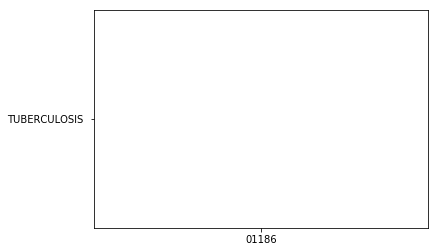

In [24]:
plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [ ]:
## gender. male female

# X  is ndarray
#An m by n array of m original observations in an n-dimensional space.

#X = 'GENDER'
#correlation matrix
d = sch.distance.pdist(merged.corr(), 'hamming')
L = sch.linkage(d, method='complete')
##corrleation distance for binary category var gender 
#d = sch.distance.pdist(X, lambda u, v: u != v)

# Clustering with euclidean distance 

In [ ]:



### euclidean distance 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')  
cluster.fit_predict(datamap)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

In [ ]:
a = [[0,1,2,3,4,5,6] [a,b,c,d]] 


In [ ]:
a[:,0]

# Hierarchical Clusteirng 3 (From Deathrate file)

fix merging to find dod

In [ ]:
merged = merged1.merge(data2, on=['SUBJECT_ID'], how='left')
merged.shape
merged.head(30)

In [ ]:
# Map Categorical Data

In [ ]:

datamap = merged.copy()
#datamap['lv.1_code'] = datamap['lv.2_code']. map('11':1, '12': 2, '13': 3 )


datamap['lv.2_code'] = datamap['lv.2_code'].str.replace('V','10',regex=True)
datamap['lv.2_code'] = datamap['lv.2_code'].astype(np.float)
datamap.head(10)


In [ ]:
datamap['GENDER'] = datamap['GENDER'].map({'F':0, 'M': 1})
datamap.head(50)

In [ ]:
datamap['DOD'].head(20)

In [ ]:
datamap.dtypes

In [ ]:
dod = datamap['DOD']
print(dod[5])

In [ ]:
pd.notna(dod[5])

In [ ]:
dod = pd.notna(dod)
dod

In [ ]:
dod = dod.astype('int')
dod

In [ ]:
#dod.loc[False]
dod.iloc[634705]

In [ ]:
datamap['DOD'] =dod 
datamap['DOD'] 

# correlation distance of numerical columns 

In [ ]:
## compute correlation distance 
#Compute pairwise correlation of columns, excluding NA/null values

## only computed correlation for numerical columns 

dist = datamap.corr()
dist

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
plt.xlabel('Columns')
plt.ylabel('Correlation distances')
#dist= shc.distance.pdist(merged.corr(), 'hamming')
dend = shc.dendrogram(shc.linkage(dist, method='complete'))
#dend = shc.dendrogram(shc.linkage(d, merged, method='complete'))


In [ ]:
# Hierarchial Clustering1

In [ ]:

from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='=complete')
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

In [ ]:
print(cluster.labels_)

In [ ]:
dist1 = dist.iloc[:,0]
dist2 = dist.iloc[:,1]

In [ ]:
dist1

In [ ]:
#plt.figure(figsize=(10, 7))
#plt.scatter(dist[:,0], dist[:,1], c=cluster.labels_, cmap='rainbow')

plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [ ]:
dist1

In [ ]:
# Clustering with 3 clusters

In [ ]:
## 3 clusters 
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

In [ ]:

dist1 = dist.iloc[:,0]
dist2 = dist.iloc[:,1]
plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [ ]:
plt.scatter(dist1, dist2, cmap='rainbow')